<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

# load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/'

t651_df = pd.read_csv(root+'t651_train.csv',index_col=0).dropna(axis=0)
idx = t651_df.index

c620_df = pd.read_csv(root+'c620_train.csv',index_col=0).loc[idx]
c620_mb = pd.read_csv(root+'c620_mbcheck.csv',index_col=0).loc[idx]

c660_df = pd.read_csv(root+'c660_train.csv',index_col=0).loc[idx]
c660_mb = pd.read_csv(root+'c660_mbcheck.csv',index_col=0).loc[idx]

c670_df = pd.read_csv(root+'c670_train.csv',index_col=0).loc[idx]
c670_mb = pd.read_csv(root+'c670_mbcheck.csv',index_col=0).loc[idx]

In [4]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/'
c620_col = joblib.load(root+'c620_col_names.pkl')
c660_col = joblib.load(root+'c660_col_names.pkl')
c670_col = joblib.load(root+'c670_col_names.pkl')
t651_col = joblib.load(root+'t651_col_names.pkl')

# check c620&t651 -> c660

In [5]:
t651_mf = t651_df[t651_col['MFR']]
c620_mf = c620_mb.iloc[:,[3]]
total = t651_mf.values + c620_mf.values
t651_mf = t651_mf/total
c620_mf = c620_mf/total
t651_x41 = t651_df[t651_col['x41']]
c620_w3 = c620_df[c620_col['sidedraw_x']]
c660_feed_pred = c620_w3.values*c620_mf.values + t651_x41.values*t651_mf.values
c660_feed_pred = pd.DataFrame(c660_feed_pred,index=idx,columns=c660_col['x41'])
c660_feed_pred.head(3)

,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Nitrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Oxygen_wt%
001-001,0.0,0.000175,0.011354,0.021681,0.014908,0.019511,0.030082,66.278216,0.02099,0.034398,0.0,0.014600,27.873568,0.028611,0.024798,0.020281,3.132133,0.632336,1.318028,0.365566,0.044484,1.951733e-08,0.098763,3.399222e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896395e-09,1.684247e-10,0.001555,0.000415,6.044997e-10,0.0,6.479632e-12,3.103609e-13,3.014521e-16,0.0,0.0
001-002,0.0,0.000175,0.011353,0.021678,0.014906,0.019510,0.030081,66.278232,0.02099,0.034399,0.0,0.014601,27.873554,0.028611,0.024798,0.020281,3.132134,0.632336,1.318029,0.365566,0.044484,1.951592e-08,0.098764,3.398967e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896085e-09,1.684114e-10,0.001555,0.000415,6.044514e-10,0.0,6.479096e-12,3.103352e-13,3.014266e-16,0.0,0.0
001-003,0.0,0.000175,0.011354,0.021680,0.014907,0.019510,0.030082,66.278226,0.02099,0.0

In [6]:
c660_feed = c660_df[c660_col['x41']]
c660_feed.head(3)

,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Nitrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Oxygen_wt%
001-001,0.0,0.000175,0.011354,0.021681,0.014908,0.019511,0.030082,66.278221,0.02099,0.034398,0.0,0.014600,27.873569,0.028611,0.024798,0.020281,3.132133,0.632336,1.318029,0.365566,0.044484,1.951733e-08,0.098763,3.399222e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896395e-09,1.684246e-10,0.001555,0.000415,6.044996e-10,0.0,6.479631e-12,3.103609e-13,3.014521e-16,0.0,0.0
001-002,0.0,0.000175,0.011353,0.021678,0.014906,0.019510,0.030081,66.278244,0.02099,0.034399,0.0,0.014601,27.873554,0.028611,0.024798,0.020281,3.132135,0.632336,1.318029,0.365566,0.044484,1.951592e-08,0.098764,3.398968e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896086e-09,1.684114e-10,0.001555,0.000415,6.044514e-10,0.0,6.479096e-12,3.103352e-13,3.014266e-16,0.0,0.0
001-003,0.0,0.000175,0.011354,0.021680,0.014907,0.019510,0.030082,66.278236,0.02099,0.0

In [7]:
np.allclose(c660_feed.values,c660_feed_pred.values)

True

# check c620,c660 -> c670

In [8]:
c660_w4 = c660_df[c660_col['bottoms_x']]
c620_w4 = c620_df[c620_col['bottoms_x']]
Tray_43_mfr = c670_mb.iloc[:,[1]]
Tray_54_mfr = c670_mb.iloc[:,[2]]
total = Tray_43_mfr.values + Tray_54_mfr.values
Tray_43_mfr = Tray_43_mfr/total
Tray_54_mfr = Tray_54_mfr/total
combined_pred = c660_w4.values*Tray_43_mfr.values + c620_w4.values*Tray_54_mfr.values
combined_pred = pd.DataFrame(combined_pred,index=idx,columns=c670_col['combined'])
combined_pred.head(3)

,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Hydrogen_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Propane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Butane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Pentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Hexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Benzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Heptane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Water_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Toluene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Octane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_p-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_m-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_o-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Nonane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Indane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2-Diethylbenzene_wt%",Tol

In [9]:
combined = c670_df[c670_col['combined']]
combined.head(3)

,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Hydrogen_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Propane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Butane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Pentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Hexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Benzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Heptane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Water_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Toluene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Octane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_p-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_m-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_o-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Nonane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Indane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2-Diethylbenzene_wt%",Tol

In [10]:
np.allclose(combined_pred.values,combined.values)

True

# bf 41*2 check

In [11]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/'
c670_df2 = pd.read_csv(root+'c670_train_V2.csv',index_col=0).loc[idx]

In [12]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/'
c670_col_V2 = joblib.load(root+'c670_col_names_V2.pkl')

In [13]:
c670_col_V2.keys()

dict_keys(['xTray43', 'xTray54', 'combined', 'yRefluxRate', 'yControl', 'yHeatDuty', 'distillate_x', 'bottoms_x', 'distillate_sf', 'bottoms_sf', 'upper_bf', 'lower_bf', 'density'])

In [14]:
c670_df2[c670_col_V2['xTray43']].sum(axis=1).mean(),\
c670_df2[c670_col_V2['xTray54']].sum(axis=1).mean(),\
(c670_df2[c670_col_V2['upper_bf']].values+c670_df2[c670_col_V2['lower_bf']].values).sum(axis=1).mean()

(100.00000140163392, 99.99999991852421, 41.0)

# 修改前

In [15]:
np.allclose(c670_df2[c670_col_V2['upper_bf']].values+c670_df2[c670_col_V2['lower_bf']].values,1.0)

True

In [16]:
# 根據條件修改值
a = c670_df2[c670_col_V2['upper_bf']+c670_col_V2['lower_bf']]
紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
print(len(紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位))
c670_df2.loc[:,紫色零點零欄位] = 0.0001 
c670_df2.loc[:,紫色零點一欄位] = 0.0001 
c670_df2.loc[:,紫色零點九欄位] = 0.9999
c670_df2.loc[:,紫色一點零欄位] = 0.9999
c670_df2[紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位].head()

# 確認質量平衡
assert np.allclose(c670_df2[c670_col_V2['upper_bf']].values+c670_df2[c670_col_V2['lower_bf']].values,1.0)

# 轉換成combined
x1 = c670_df2.loc[idx,c670_col_V2['xTray43']].values
x2 = c670_df2.loc[idx,c670_col_V2['xTray54']].values
bf1 = c670_df2.loc[idx,c670_col_V2['upper_bf']].values
bf2 = c670_df2.loc[idx,c670_col_V2['lower_bf']].values
print(x1.shape,x2.shape,bf1.shape,bf2.shape)
combined_real = c670_df2.loc[idx,c670_col_V2['combined']].values
combined_pred = x1*bf1 + x2*bf2
np.allclose(combined_real,combined_pred)

24
(15547, 41) (15547, 41) (15547, 41) (15547, 41)


False

# check massblance

In [17]:
# check mb data
np.allclose(c620_mb.iloc[:,0].values,c620_mb.iloc[:,1:].sum(axis=1).values),\
np.allclose(c660_mb.iloc[:,0].values,c660_mb.iloc[:,1:].sum(axis=1).values),\
np.allclose(c670_mb.iloc[:,[1,2]].sum(axis=1).values,c670_mb.iloc[:,[3,4]].sum(axis=1).values)

(True, True, True)

In [18]:
def check_massblance(df,mb,c,name):
  if (name == 'c620') or (name == 'c660'):
    feed = df[c['x41']]*mb.iloc[:,0].values.reshape(-1,1)
    wt1 = df[c['vent_gas_x']]*mb.iloc[:,1].values.reshape(-1,1)
    wt2 = df[c['distillate_x']]*mb.iloc[:,2].values.reshape(-1,1)
    wt3 = df[c['sidedraw_x']]*mb.iloc[:,3].values.reshape(-1,1)
    wt4 = df[c['bottoms_x']]*mb.iloc[:,4].values.reshape(-1,1)
    a = feed.values
    b = wt1.values+wt2.values+wt3.values+wt4.values
    print('max error:',np.abs(a-b).max())
    return pd.DataFrame(a),pd.DataFrame(b)
  elif name == 'c670':
    feed1 = df[c['xTray43']]*mb.iloc[:,1].values.reshape(-1,1)
    feed2 = df[c['xTray54']]*mb.iloc[:,2].values.reshape(-1,1)
    wt1 = df[c['distillate_x']]*mb.iloc[:,3].values.reshape(-1,1)
    wt2 = df[c['bottoms_x']]*mb.iloc[:,4].values.reshape(-1,1)
    a = feed1.values+feed2.values
    b = wt1.values+wt2.values
    print('max error:',np.abs(a-b).max())
    return pd.DataFrame(a),pd.DataFrame(b)

max error: 0.004956141914590262


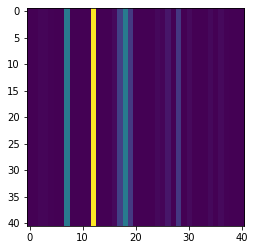

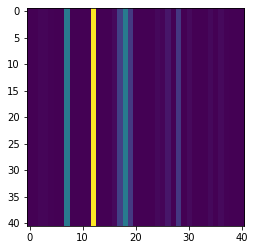

In [19]:
a,b = check_massblance(c620_df,c620_mb,c620_col,'c620')
plt.imshow(a.head(41).values)
plt.show()
plt.imshow(b.head(41).values)

max error: 0.00440136862835061


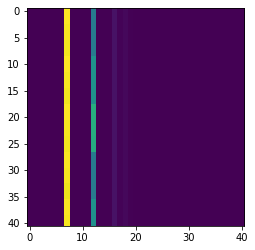

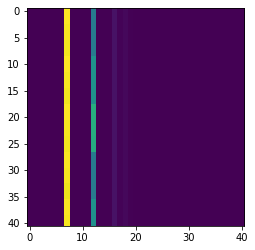

In [20]:
a,b = check_massblance(c660_df,c660_mb,c660_col,'c660')
plt.imshow(a.head(41).values)
plt.show()
plt.imshow(b.head(41).values)

max error: 0.010997912117090891


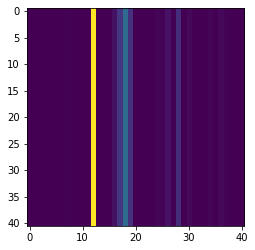

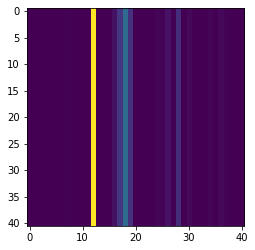

In [21]:
a,b = check_massblance(c670_df,c670_mb,c670_col,'c670')
plt.imshow(a.head(41).values)
plt.show()
plt.imshow(b.head(41).values)